<a href="https://colab.research.google.com/github/vijaykalmani/Census-Income-Project/blob/main/Census_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project on Census income 

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
%cd /content/drive/MyDrive/census_income

/content/drive/MyDrive/census_income


In [9]:
data = pd.read_csv('census-income.csv')

## 1. Data Preprocessing

#### - Data Preprocessing - converting the raw data into a clean data set. 
#### - Whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis.
#### - Pre-processing refers to the transformations applied to your data before feeding it to the algorithm.
#### - In python, scikit-learn library has a pre-built functionality under sklearn.preprocessing

## Replacing ? with None

In [10]:
data=data.replace(' ?',np.nan)

## Remove all the rows that contain NA values 

In [11]:
data=data.dropna()

In [12]:
data.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


## 2. Data Manipulation 

### a) Extract the “education” column and store it in “census_ed” .


In [13]:
census_ed=data[' education']
census_ed

0          Bachelors
1          Bachelors
2            HS-grad
3               11th
4          Bachelors
            ...     
32556     Assoc-acdm
32557        HS-grad
32558        HS-grad
32559        HS-grad
32560        HS-grad
Name:  education, Length: 30162, dtype: object

### b) Extract all the columns from “age” to “relationship” and store it in “census_seq”.

In [14]:
census_seq=data.iloc[:,0:8]
census_seq

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife
...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child


### c) Extract the column number “5”, “8”, “11” and store it in “census_col”.

In [15]:
census_col=data.iloc[:, [5,8,11]]
census_col

,marital-status,race,capital-loss
0,Never-married,White,0
1,Married-civ-spouse,White,0
2,Divorced,White,0
3,Married-civ-spouse,Black,0
4,Married-civ-spouse,Black,0
...,...,...,...
32556,Married-civ-spouse,White,0
32557,Married-civ-spouse,White,0
32558,Widowed,White,0
32559,Never-married,White,0


### d) Extract all the male employees who work in state-gov and store it in “male_gov”.

In [16]:
filter1 = data[" sex"]==" Male"
filter2 = data[" workclass"]==" State-gov"
male_gov=data.loc[(filter1) & (filter2)]
male_gov

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
34,22,State-gov,311512,Some-college,10,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,15,United-States,<=50K
48,41,State-gov,101603,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
123,29,State-gov,267989,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32163,36,State-gov,135874,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
32241,45,State-gov,231013,Bachelors,13,Divorced,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32321,54,State-gov,138852,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
32324,42,State-gov,138162,Some-college,10,Divorced,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K


### e) Extract all the 39 year olds who either have a bachelor's degree or who are
### native of the United States and store the result in “census_us”.

In [17]:
filterAge = data["age"]==39
filterDegree = data[" education"]==" Bachelors"
filterNative = data[" native-country"]==" United-States"
census_us=data.loc[(filterAge)& ((filterDegree) | (filterNative))]
census_us

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K
129,39,Private,365739,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
166,39,Federal-gov,235485,Assoc-acdm,12,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,42,United-States,<=50K
320,39,Self-emp-not-inc,174308,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32146,39,Private,117381,Some-college,10,Divorced,Transport-moving,Not-in-family,White,Male,0,0,65,United-States,<=50K
32260,39,Federal-gov,232036,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
32428,39,Federal-gov,110622,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,Asian-Pac-Islander,Female,0,0,40,Philippines,<=50K
32468,39,Self-emp-not-inc,193689,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,65,United-States,<=50K


### f) Extract 200 random rows from the “census” data frame and store it in “census_200”.

In [18]:
census_200=data.sample(n = 200)
census_200

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
30348,29,Private,250967,Assoc-voc,11,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,1887,48,United-States,>50K
13204,43,Private,115562,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,42,United-States,>50K
2889,36,Private,248010,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,45,United-States,<=50K
16361,24,Private,210781,Bachelors,13,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,France,<=50K
410,41,Local-gov,42346,Some-college,10,Divorced,Other-service,Not-in-family,Black,Female,0,0,24,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5403,32,Private,340940,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
5129,60,Self-emp-not-inc,143932,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
12242,46,State-gov,20534,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,45,United-States,<=50K
18041,58,Private,182123,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,44,United-States,<=50K


### g) Get the count of different levels of the “workclass” column.

In [19]:
data[' workclass'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name:  workclass, dtype: int64

### h) Calculate the mean of the “capital.gain” column grouped according to “workclass”.

In [20]:
data.groupby(' workclass', as_index=False)[' capital-gain'].mean()

,workclass,capital-gain
0,Federal-gov,832.321315
1,Local-gov,829.230285
2,Private,879.858207
3,Self-emp-inc,4810.746741
4,Self-emp-not-inc,1913.134454
5,State-gov,684.306489
6,Without-pay,487.857143


### i) Create a separate dataframe with the details of males and females from the census data that has income more than 50,000

In [21]:
filterMore = data["income"]==' >50K'
second_data= data.loc[(filterMore)]
second_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,139180,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


### j) Calculate the percentage of people from the United States who are private employees and earn less than 50,000 annually. 


In [22]:
filterLess = data["income"]==' <=50K'
filterUS = data[" native-country"]==' United-States'
filterType = data[" workclass"]==' Private'
third_data= data.loc[(filterLess)&(filterUS)&(filterType)]
result=len(third_data.index)/len(data.index)
result = "{:.0%}". format(result)
print(result)

52%


### k) Calculate the percentage of married people in the census data.

In [23]:
fourth_data= data.loc[(data[" marital-status"]==' Married-spouse-absent')
                      |(data[" marital-status"]==' Married-civ-spouse')|(data[" marital-status"]==' Married-AF-spouse')]
fourth=len(fourth_data.index)/len(data.index)
secondresult = "{:.0%}". format(fourth)
print(secondresult)

48%


### l) Calculate the percentage of high school graduates earning more than 50,000 annually.

In [24]:
filterGrad = data[" education"]==" HS-grad"
filterGreater50 = data["income"]==" >50K"
fifth_data= data.loc[(filterGrad)&(filterGreater50)]

fifth=len(fifth_data.index)/len(data.index)
fifthresult = "{:.0%}". format(fifth)
print(fifthresult)

5%


## Linear Regression:


### a) Build a simple linear regression model as follows:

###### ●	Divide the dataset into training and test sets in 70:30 ratio.
###### ●	Build a linear model on the test set where the dependent variable is “hours.per.week” and the independent variable is “education.num”.
###### ●	Predict the values on the train set and find the error in prediction. 
###### ●	Find the root-mean-square error (RMSE).


In [25]:
df = data.copy()
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### LabelEncoder() - Encode target labels with value between 0 and n_classes-1.

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#fit_transform(variable) -- Fit label encoder and return encoded labels.
df=df.apply(le.fit_transform)

In [27]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,5,2491,9,12,4,0,1,4,1,24,0,39,38,0
1,33,4,2727,9,12,2,3,0,4,1,0,0,12,38,0
2,21,2,13188,11,8,0,5,1,4,1,0,0,39,38,0
3,36,2,14354,1,6,2,5,0,2,1,0,0,39,38,0
4,11,2,18120,9,12,2,9,5,2,0,0,0,39,4,0


In [28]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

 
# get the locations (dependent variable is “hours.per.week” and the independent variable is “education.num”.)
X = data.iloc[:, -3]
y = data.iloc[:, -11]
 
# split the dataset in ratio of 70:30
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [29]:
X.head()

0    40
1    13
2    40
3    40
4    40
Name:  hours-per-week, dtype: int64

In [30]:
y.head()

0    13
1    13
2     9
3     7
4    13
Name:  education-num, dtype: int64

#### model.fit() : fit training data. For supervised learning applications, this accepts two arguments: the data X and the labels y (e.g. model.fit(X, y)). For unsupervised learning applications, this accepts only a single argument, the data X (e.g. model.fit(X)).

In [31]:
X_train = np.array(X_train)
y_train = np.array(y_train)
linear = LinearRegression()
linear.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

In [32]:
#Predicting 
X_train=np.array(X_train)
data_pred = linear.predict(X_train.reshape(-1, 1))
print("Predicated train data set = ",data_pred)

Predicated train data set =  [10.07765852 10.73753601  9.81370753 ... 10.24262789 10.73753601
  9.91268915]


In [33]:
# error  for model
y_test=np.array(y_train)
accuracy=linear.score(X_train.reshape(-1, 1), y_train)
err=1-accuracy
err = "{:.0%}". format(err)
print("Error in Prediction = ",err)

Error in Prediction =  98%


In [34]:
#Root mean square error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_train, data_pred)
print("Root mean square error = ",mae)

Root mean square error =  1.8943613985146013


In [35]:
df.dtypes

age                int64
 workclass         int64
 fnlwgt            int64
 education         int64
 education-num     int64
 marital-status    int64
 occupation        int64
 relationship      int64
 race              int64
 sex               int64
 capital-gain      int64
 capital-loss      int64
 hours-per-week    int64
 native-country    int64
income             int64
dtype: object

In [36]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,5,2491,9,12,4,0,1,4,1,24,0,39,38,0
1,33,4,2727,9,12,2,3,0,4,1,0,0,12,38,0
2,21,2,13188,11,8,0,5,1,4,1,0,0,39,38,0
3,36,2,14354,1,6,2,5,0,2,1,0,0,39,38,0
4,11,2,18120,9,12,2,9,5,2,0,0,0,39,4,0


In [37]:
df.dtypes

age                int64
 workclass         int64
 fnlwgt            int64
 education         int64
 education-num     int64
 marital-status    int64
 occupation        int64
 relationship      int64
 race              int64
 sex               int64
 capital-gain      int64
 capital-loss      int64
 hours-per-week    int64
 native-country    int64
income             int64
dtype: object

## 4) Logistic Regression:


### a) Build a simple logistic regression model as follows:
###### ●	Divide the dataset into training and test sets in 65:35 ratio.
###### ●	Build a logistic regression model where the dependent variable is “X”(yearly income) and the independent variable is “occupation”.
###### ●	Predict the values on the test set.
###### ●	Build a confusion matrix and find the accuracy.


In [38]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,5,2491,9,12,4,0,1,4,1,24,0,39,38,0
1,33,4,2727,9,12,2,3,0,4,1,0,0,12,38,0
2,21,2,13188,11,8,0,5,1,4,1,0,0,39,38,0
3,36,2,14354,1,6,2,5,0,2,1,0,0,39,38,0
4,11,2,18120,9,12,2,9,5,2,0,0,0,39,4,0


In [39]:
X = df.iloc[:, -8]
y = df.iloc[:, -1]

y=y.astype('int')

# split the dataset in 65:35 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)

In [40]:
X.head()

0    1
1    0
2    1
3    0
4    5
Name:  relationship, dtype: int64

In [41]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [42]:
df[[' occupation']].value_counts()

 occupation
9              4038
2              4030
3              3992
0              3721
11             3584
7              3212
6              1966
13             1572
5              1350
4               989
12              912
10              644
8               143
1                 9
dtype: int64

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score
X_test=np.array(X_test)
X_train=np.array(X_train)
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train.reshape(-1, 1),y_train)
y_pred = logreg.predict(X_test.reshape(-1, 1))
print ("So, Our accuracy Score is: {}".format(round(accuracy_score(y_pred, y_test),4)))

So, Our accuracy Score is: 0.7503


In [44]:
# Creates a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) 
print("Confusion matrix = \n",cm)

Confusion matrix = 
 [[7921    0]
 [2636    0]]


### b) Build a multiple logistic regression model as follows:
###### ●	Divide the dataset into training and test sets in 80:20 ratio.
###### ●	Build a logistic regression model where the dependent variable is “X”(yearly income) and independent variables are “age”, “workclass”, and “education”.
###### ●	Predict the values on the test set.
###### ●	Build a confusion matrix and find the accuracy.


In [45]:
y = df.iloc[:, -1]
X = df.iloc[:, [0,1,3]]

y=y.astype('int')

# split the dataset  80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [46]:
X.head()

,age,workclass,education
0,22,5,9
1,33,4,9
2,21,2,11
3,36,2,1
4,11,2,9


In [47]:
y.head()


0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score
X_test=np.array(X_test)
X_train=np.array(X_train)
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)\


y_pred = logreg.predict(X_test)

#y_pred = logreg.predict(X_test.reshape(-1, 1))
print ("So, Our accuracy Score is: {}".format(round(accuracy_score(y_pred, y_test),4)))

So, Our accuracy Score is: 0.7345


In [49]:
# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred) 
print(cm)

[[4394  138]
 [1464   37]]


## 5) Decision Tree
### a) Build a decision tree model as follows:

###### ●	Divide the dataset into training and test sets in 70:30 ratio.
###### ●	Build a decision tree model where the dependent variable is “X”(Yearly Income) and the rest of the variables as independent variables.
###### ●	Predict the values on the test set.
###### ●	Build a confusion matrix and calculate the accuracy.


In [50]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
#y=y.astype('int')

# split the dataset in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [51]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,22,5,2491,9,12,4,0,1,4,1,24,0,39,38
1,33,4,2727,9,12,2,3,0,4,1,0,0,12,38
2,21,2,13188,11,8,0,5,1,4,1,0,0,39,38
3,36,2,14354,1,6,2,5,0,2,1,0,0,39,38
4,11,2,18120,9,12,2,9,5,2,0,0,0,39,4


In [52]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

print('Confusion Matrix :')
print(confusion_matrix(y_pred,y_test))
print('Accuracy Score is : ',accuracy_score(y_test,y_pred))

Confusion Matrix :
[[5876  908]
 [ 893 1372]]
Accuracy Score is :  0.8009724831473091


## 6) Random Forest
### a) Build a random forest model as follows:
###### ●	Divide the dataset into training and test sets in 80:20 ratio.
######  ●	Build a random forest model where the dependent variable is “X”(Yearly Income) and the rest of the variables as independent variables and number of trees as 300.
######  ●	Predict values on the test set
######  ●	Build a confusion matrix and calculate the accuracy



In [54]:
X = df.iloc[:, :-2]
y = df.iloc[:, -1]

In [55]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
0,22,5,2491,9,12,4,0,1,4,1,24,0,39
1,33,4,2727,9,12,2,3,0,4,1,0,0,12
2,21,2,13188,11,8,0,5,1,4,1,0,0,39
3,36,2,14354,1,6,2,5,0,2,1,0,0,39
4,11,2,18120,9,12,2,9,5,2,0,0,0,39


In [56]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

In [57]:
y.dtypes

dtype('int64')

In [58]:
from sklearn.ensemble import RandomForestClassifier

# split the dataset in 89:20
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

rf=RandomForestClassifier(n_estimators=300)

rf.fit(x_train,y_train)

y_pred=rf.predict(x_test)

print('Confusion Matrix :')
print(confusion_matrix(y_pred,y_test))

print('Accuracy Score :',accuracy_score(y_test,y_pred))

Confusion Matrix :
[[4178  576]
 [ 305  974]]
Accuracy Score : 0.8539698325874358


## 7. For this problem, use the population dataset, and perform the following:
###### 1.	EDA on the time series to find trends and seasonality.
###### 2.	Forecast the population on the given dataset for the next 6 months. 


In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [60]:
Population = pd.read_csv('2021_population.csv')
Population.head()

,iso_code,country,2021_last_updated,2020_population,area,density_sq_km,growth_rate,world_%,rank
0,CHN,China,"1,447,065,329","1,439,323,776","9,706,961 sq_km",149/sq_km,0.34%,18.34%,1
1,IND,India,"1,401,310,563","1,380,004,385","3,287,590 sq_km",424/sq_km,0.97%,17.69%,2
2,USA,United States,"334,058,426","331,002,651","9,372,610 sq_km",36/sq_km,0.58%,4.23%,3
3,IDN,Indonesia,"278,037,263","273,523,615","1,904,569 sq_km",145/sq_km,1.04%,3.51%,4
4,PAK,Pakistan,"227,724,796","220,892,340","881,912 sq_km",255/sq_km,1.95%,2.86%,5


In [61]:
Population.drop('iso_code',axis=1,inplace=True)
Population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   country            224 non-null    object
 1   2021_last_updated  224 non-null    object
 2   2020_population    224 non-null    object
 3   area               224 non-null    object
 4   density_sq_km      224 non-null    object
 5   growth_rate        224 non-null    object
 6   world_%            224 non-null    object
 7   rank               224 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 14.1+ KB


In [62]:
Population['2021_last_updated'] = Population['2021_last_updated'].apply(lambda x: int(x.replace(',','')))
Population['2020_population'] = Population['2020_population'].apply(lambda x: int(x.replace(',','')))
Population['area'] = Population['area'].apply(lambda x: x.split(' ')[0])
Population['area'] = Population['area'].apply(lambda x: int(x.replace(',','')))
Population['density_sq_km'] = Population['density_sq_km'].apply(lambda x: x.split('/')[0])
Population['density_sq_km'] = Population['density_sq_km'].apply(lambda x: int(x.replace(',','')))
Population['growth_rate'] = Population['growth_rate'].apply(lambda x: float(x.replace('%','')))
Population['world_%'] = Population['world_%'].apply(lambda x: float(x.replace('%','')))

In [63]:
Population.drop(['2020_population'],axis=1,inplace=True)
Population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            224 non-null    object 
 1   2021_last_updated  224 non-null    int64  
 2   area               224 non-null    int64  
 3   density_sq_km      224 non-null    int64  
 4   growth_rate        224 non-null    float64
 5   world_%            224 non-null    float64
 6   rank               224 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 12.4+ KB


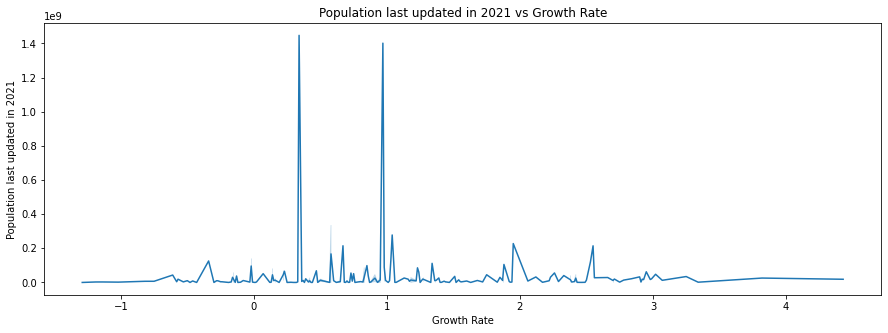

In [64]:
plt.figure(figsize=(15,5))
sns.lineplot(x='growth_rate',y='2021_last_updated',data=Population)
plt.title('Population last updated in 2021 vs Growth Rate')
plt.xlabel('Growth Rate')
plt.ylabel('Population last updated in 2021')
plt.show()

In [65]:
Population['growth_rate'].describe()

count    224.000000
mean       1.057946
std        1.053640
min       -1.290000
25%        0.295000
50%        0.920000
75%        1.770000
max        4.430000
Name: growth_rate, dtype: float64

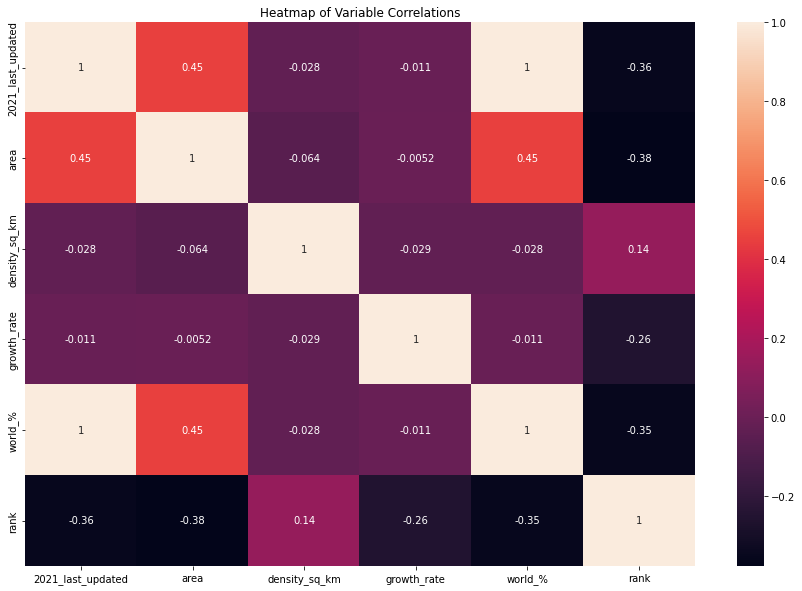

In [66]:
plt.figure(figsize=(15,10))
sns.heatmap(Population.corr(),annot=True)
plt.title('Heatmap of Variable Correlations')
plt.show()

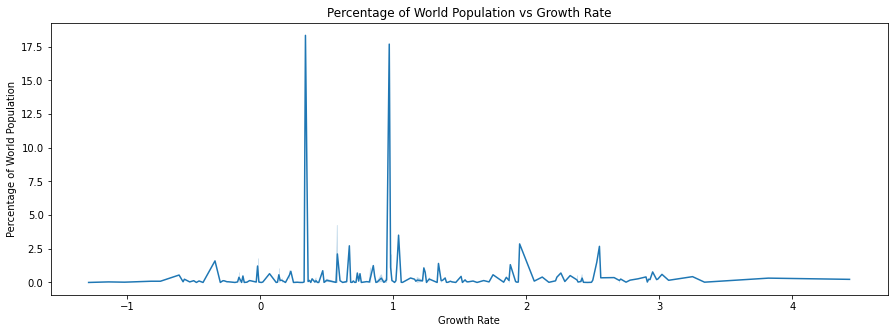

In [67]:
plt.figure(figsize=(15,5))
sns.lineplot(x='growth_rate',y='world_%',data=Population)
plt.title('Percentage of World Population vs Growth Rate')
plt.xlabel('Growth Rate')
plt.ylabel('Percentage of World Population')
plt.show()

In [68]:
from sklearn.preprocessing import StandardScaler
Population_clust = Population.drop(['rank','country','area','world_%'],axis=1)
col = Population_clust.columns
scaler = StandardScaler()
Population_clust = scaler.fit_transform(Population_clust)
Population_clust = pd.DataFrame(Population_clust,columns=col)
Population_clust.head()

,2021_last_updated,density_sq_km,growth_rate
0,10.131368,-0.148438,-0.682923
1,9.803105,-0.018094,-0.083656
2,2.146205,-0.201998,-0.454631
3,1.744287,-0.150334,-0.017071
4,1.383325,-0.098196,0.848536


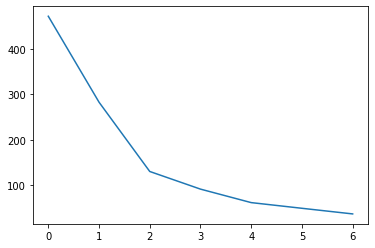

In [69]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Population_clust)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)
plt.show()

In [70]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Population_clust)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(Population_clust, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.8567314297814396
For n_clusters=3, the silhouette score is 0.8626025684116045
For n_clusters=4, the silhouette score is 0.5074953926466323
For n_clusters=5, the silhouette score is 0.4513046336578909
For n_clusters=6, the silhouette score is 0.47508942157055994
For n_clusters=7, the silhouette score is 0.49867752343628124
For n_clusters=8, the silhouette score is 0.45129804687765124


In [71]:
kmeans = KMeans(n_clusters=4,max_iter=100)
kmeans.fit(Population_clust)

KMeans(max_iter=100, n_clusters=4)

In [72]:
Population['Cluster_ID'] = kmeans.labels_
Population.head()

,country,2021_last_updated,area,density_sq_km,growth_rate,world_%,rank,Cluster_ID
0,China,1447065329,9706961,149,0.34,18.34,1,3
1,India,1401310563,3287590,424,0.97,17.69,2,3
2,United States,334058426,9372610,36,0.58,4.23,3,0
3,Indonesia,278037263,1904569,145,1.04,3.51,4,0
4,Pakistan,227724796,881912,255,1.95,2.86,5,1


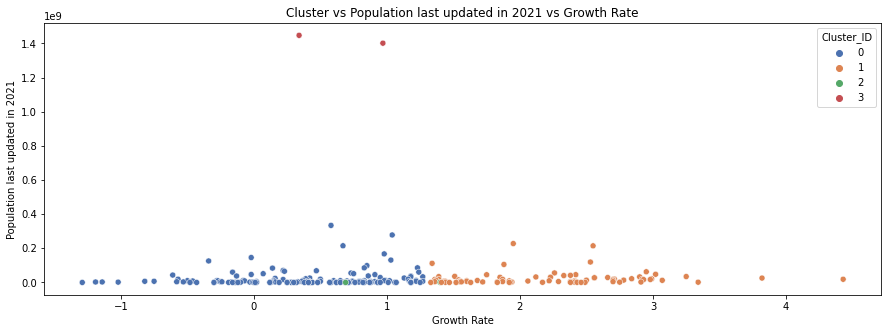

In [73]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='growth_rate',y='2021_last_updated',hue='Cluster_ID',palette='deep',data=Population)
plt.title('Cluster vs Population last updated in 2021 vs Growth Rate')
plt.xlabel('Growth Rate')
plt.ylabel('Population last updated in 2021')
plt.show()

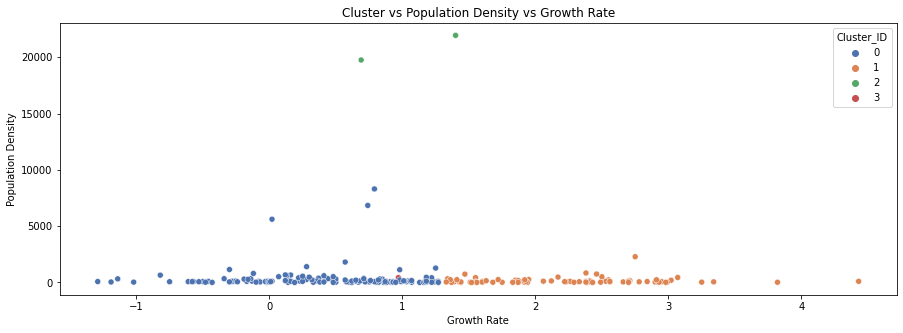

In [74]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='growth_rate',y='density_sq_km',hue='Cluster_ID',palette='deep',data=Population)
plt.title('Cluster vs Population Density vs Growth Rate')
plt.xlabel('Growth Rate')
plt.ylabel('Population Density')
plt.show()

In [75]:
Population_time_series = pd.read_csv('timeseries_population_count.csv')
Population_time_series['current_population'] = Population_time_series['current_population'].apply(lambda x: int(x.replace(',','')))
Population_time_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56460 entries, 0 to 56459
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   iso_code            56460 non-null  object
 1   country             56460 non-null  object
 2   current_population  56460 non-null  int64 
 3   updated_datetime    56460 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [76]:
Population_time_series['updated_datetime'] =  pd.to_datetime(Population_time_series['updated_datetime'], format='%Y-%m-%d %H:%M:%S.%f')
Population_time_series['updated_datetime'].dtype


dtype('<M8[ns]')

In [77]:
Population_time_series_India = Population_time_series[Population_time_series.country == 'India']
Population_time_series_India = Population_time_series_India[['current_population','updated_datetime']]
Population_time_series_India.head()

,current_population,updated_datetime
1,1392365583,2021-06-02 12:55:28.499834
229,1392401845,2021-06-03 12:39:45.359468
457,1392438885,2021-06-04 12:54:36.404126
685,1392475166,2021-06-05 12:39:39.550830
913,1392511820,2021-06-06 12:39:20.804163


In [78]:
Population_time_series_India.set_index('updated_datetime',inplace=True)
Population_time_series_India.head()

,current_population
updated_datetime,
2021-06-02 12:55:28.499834,1392365583
2021-06-03 12:39:45.359468,1392401845
2021-06-04 12:54:36.404126,1392438885
2021-06-05 12:39:39.550830,1392475166
2021-06-06 12:39:20.804163,1392511820


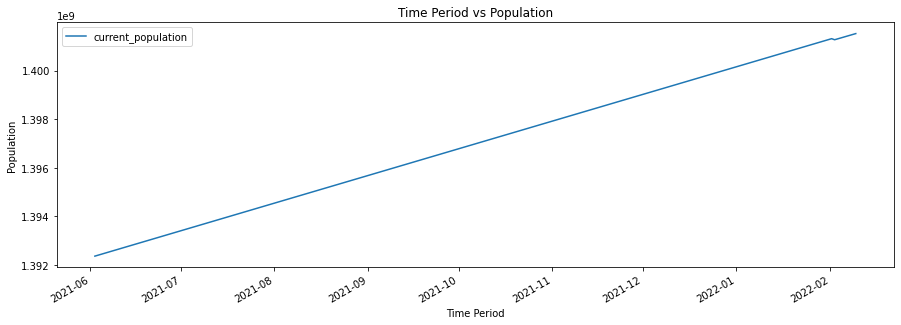

In [79]:
Population_time_series_India.plot(figsize=(15,5))
plt.title('Time Period vs Population')
plt.xlabel('Time Period')
plt.ylabel('Population')
plt.show()